# A220 payload-range plotter

In [ ]:
# imports
import os
import matplotlib.pyplot as plt
import json
import RCAIDE.Framework.Core.Units as Units
import numpy as np

In [13]:
directory = "A220_data/"
payload_range_data = {}

max_payload = 15128
max_fuel_payload = {'Ethane': 13661.034029850744, 'Methane': 15128, 'Propane': 12819.208358208954, 'Ethanol': 8250.886507462688,
                    'Butanol': 8025.5999999999985, 'Propanol': 8025.5999999999985, 'Jet A1': 8025.5999999999985, 'Liquid Natural Gas': 15128,
                    "Liquid Petroleum Gas": 14453.571462686567}
for root, dirs, files in os.walk(directory):
    for file in files:
        extension = file.split(".")[-1]
        fuel_name = file.split("_")[0]
        if extension == 'json':
            print(extension, fuel_name)

            with open(directory + file, "r+") as json_file:
                range_data = json.loads(json_file.read())
                payload_data = [15128, 15128, max_fuel_payload[fuel_name], 0]
                payload_range_data[fuel_name] = {"range": range_data, "payload": payload_data}
                print(payload_range_data[fuel_name])

json Butanol
{'range': [0.0, 1514751.1584757965, 3033026.9634629115, 3222084.906180806], 'payload': [15128, 15128, 8025.5999999999985, 0]}
json Ethane
{'range': [0.0, 2445001.792226899, 2890781.128845588, 3207519.57162557], 'payload': [15128, 15128, 13661.034029850744, 0]}
json Ethanol
{'range': [0.0, 973609.3029157189, 2046615.1769878296, 2171168.855112419], 'payload': [15128, 15128, 8250.886507462688, 0]}
json Jet A1
{'range': [0.0, 1928713.744643162, 3757083.5425500264, 3997169.7153301206], 'payload': [15128, 15128, 8025.5999999999985, 0]}
json Liquid Natural Gas
{'range': [0.0, 2111630.0060052513, 2111621.6475988855, 2381494.0036614235], 'payload': [15128, 15128, 15128, 0]}
json Liquid Petroleum Gas
{'range': [0.0, 1925770.3658231208, 2094235.6800295177, 2326535.3080532993], 'payload': [15128, 15128, 14453.571462686567, 0]}
json Methane
{'range': [0.0, 2157775.0054924847, 2157765.596362496, 2432003.269178233], 'payload': [15128, 15128, 15128, 0]}
json Propane
{'range': [0.0, 235043

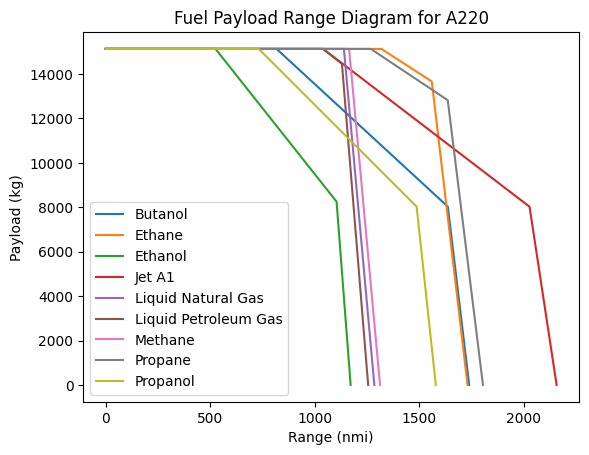

In [ ]:

for fuel_name, data in payload_range_data.items():
    range_data = np.array(data['range']) / Units.nmi
    payload_data = data['payload']
    plt.plot(range_data, payload_data, label=fuel_name)

plt.title("Fuel Payload Range Diagram for A220")
plt.xlabel("Range (nmi)")
plt.ylabel("Payload (kg)")
plt.legend()
plt.show()